# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

ceed() используется при генерации случайных чисел. функция random. seed() инициализирует генератор случайных чисел заданным значением

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [ ]:
# 10 случайных строк тренировочного датасета
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [ ]:
# первые 5 объектов тестового датасета
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
# последние 5 объектов тестового датасета
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [ ]:
# пропуски train
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [ ]:
# пропуски test
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [ ]:
# дубликаты train есть
df_train.duplicated().sum()

985

In [ ]:
# дубликаты test есть
df_test.duplicated().sum()

62

In [ ]:
# Заполните пропуски в столбцах медианами. Пока заменим только seats
median_value_seats = df_train['seats'].median()
df_train['seats'].fillna(median_value_seats, inplace=True) # заполняем медианой train
df_test['seats'].fillna(median_value_seats, inplace=True) # заполняем медианой test

<ipython-input-3-8d97f2917a52>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['seats'].fillna(median_value_seats, inplace=True) # заполняем медианой train
<ipython-input-3-8d97f2917a52>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e255ed11e78e17cab89db2a47d36798262394f1fe00d6b4b2fc6bc274b60a33f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="df_train", explorative=True)
profile.to_file("dashboard_df_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(df_test, title="df_test", explorative=True)
profile.to_file("dashboard_df_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
# 1159 объектов в трейне с одинаковым признаковым описанием
df_without_price = df_train.loc[:, df_train.columns != 'selling_price']
print('кол-во дублей по признакам:', df_without_price.duplicated().sum())
df_without_price.duplicated()

кол-во дублей по признакам: 1159


,0
0,False
1,False
2,False
3,False
4,False
...,...
6994,False
6995,False
6996,False
6997,True


In [ ]:
# Отобразите такие объекты
duplicate_rows = df_without_price[df_without_price.duplicated()]
duplicate_rows


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
# Удалите повторяющиеся строки
df_train = df_train.drop_duplicates()
# Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
df_without_price = df_train.loc[:, df_train.columns != 'selling_price']
print('кол-во дублей по признакам осталось:', df_without_price.duplicated().sum())
df_without_price = df_without_price.drop_duplicates()
df_without_price

кол-во дублей по признакам осталось: 174


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
#  объединение по индексу цены и дф без дублей
df_train = pd.merge(df_train['selling_price'], df_without_price, left_index=True, right_index=True)
df_train

,selling_price,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,450000,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,370000,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,225000,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,130000,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,440000,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,120000,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,260000,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,320000,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,135000,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train.reset_index(drop=True, inplace=True)
df_train

,selling_price,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,450000,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,370000,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,225000,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,130000,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,440000,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,120000,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,260000,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,320000,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,135000,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
df_train.dtypes

,0
selling_price,int64
name,object
year,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,object
engine,object


In [ ]:
df_train['mileage'] = df_train['mileage'].str[:-5].astype(float)
df_test['mileage'] = df_test['mileage'].str[:-5].astype(float)
median_value_mil = df_train['mileage'].median()
df_train['mileage'].fillna(median_value_mil, inplace=True)
df_test['mileage'].fillna(median_value_mil, inplace=True)

df_train['engine'] = df_train['engine'].str[:-3].astype(float)
df_test['engine'] = df_test['engine'].str[:-3].astype(float)
median_value_eng = df_train['engine'].median()
df_train['engine'].fillna(median_value_eng, inplace=True)
df_test['engine'].fillna(median_value_eng, inplace=True)

for i in range(0, len(df_train)) :
  try :
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except :
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan'] :
      continue
    elif df_train.loc[i, 'max_power'] == '0' :
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else :
      df_train.loc[i, 'max_power'] = 0

for i in range(0, len(df_test)) :
  try :
    ffil_value = float(df_test.loc[i, 'max_power'][:-4])
    df_test.loc[i, 'max_power'] = ffil_value

  except :
    if df_test.loc[i, 'max_power'] in [np.nan, 'nan'] :
      continue
    elif df_test.loc[i, 'max_power'] == '0' :
      ffil_value = float(df_test.loc[i, 'max_power'])
      df_test.loc[i, 'max_power'] = ffil_value
    else :
      df_test.loc[i, 'max_power'] = 0

df_train['max_power'] = df_train['max_power'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)
median_value_mx = df_train['max_power'].median()
df_train['max_power'].fillna(median_value_mx, inplace=True)
df_test['max_power'].fillna(median_value_mx, inplace=True)

<ipython-input-10-3137a995205a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['mileage'].fillna(median_value_mil, inplace=True)
<ipython-input-10-3137a995205a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Удалите столбец torque
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
# давайте преобразуем столбцы к более подходящим типам. А именно столбцы engnine и seats к приведем к int
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)


In [ ]:
df_test.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
# основные статистики по числовым столбцам для трейна
df_train.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,5.840000e+03,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,5.229601e+05,2013.428425,7.395224e+04,19.430841,1429.448973,87.892354,5.426712
std,5.354320e+05,4.095622,6.007114e+04,3.985973,485.662834,31.661223,0.982344
min,2.999900e+04,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2.500000e+05,2011.000000,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,4.050000e+05,2014.000000,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,6.400000e+05,2017.000000,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,1.000000e+07,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [ ]:
# основные статистики по числовым столбцам для теста
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000


In [ ]:
# основные статистики по категориальным столбцам для трейна
df_categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

for i in df_categorical_columns:
    print(df_train[i].value_counts(), '\n')

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64 

fuel
Diesel    3177
Petrol    2579
CNG         50
LPG         34
Name: count, dtype: int64 

seller_type
Individual          5223
Dealer               592
Trustmark Dealer      25
Name: count, dtype: int64 

transmission
Manual       5336
Automatic     504
Name: count, dtype: int64 

owner
First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above

In [ ]:
# основные статистики по категориальным столбцам для теста
for i in df_categorical_columns:
    print(df_test[i].value_counts(), '\n')

name
Maruti Alto 800 LXI                15
Maruti Swift Dzire VDI             12
Maruti Swift VDI                   10
Honda Jazz VX                       8
Maruti Alto LXi                     8
                                   ..
Maruti Alto 800 Base                1
Hyundai Santro Asta BSIV            1
Tata Manza Aura Quadrajet BS IV     1
Tata Manza Aqua Quadrajet           1
Honda City i DTec SV                1
Name: count, Length: 621, dtype: int64 

fuel
Diesel    534
Petrol    457
CNG         5
LPG         4
Name: count, dtype: int64 

seller_type
Individual          837
Dealer              135
Trustmark Dealer     28
Name: count, dtype: int64 

transmission
Manual       877
Automatic    123
Name: count, dtype: int64 

owner
First Owner             623
Second Owner            278
Third Owner              71
Fourth & Above Owner     27
Test Drive Car            1
Name: count, dtype: int64 



In [ ]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

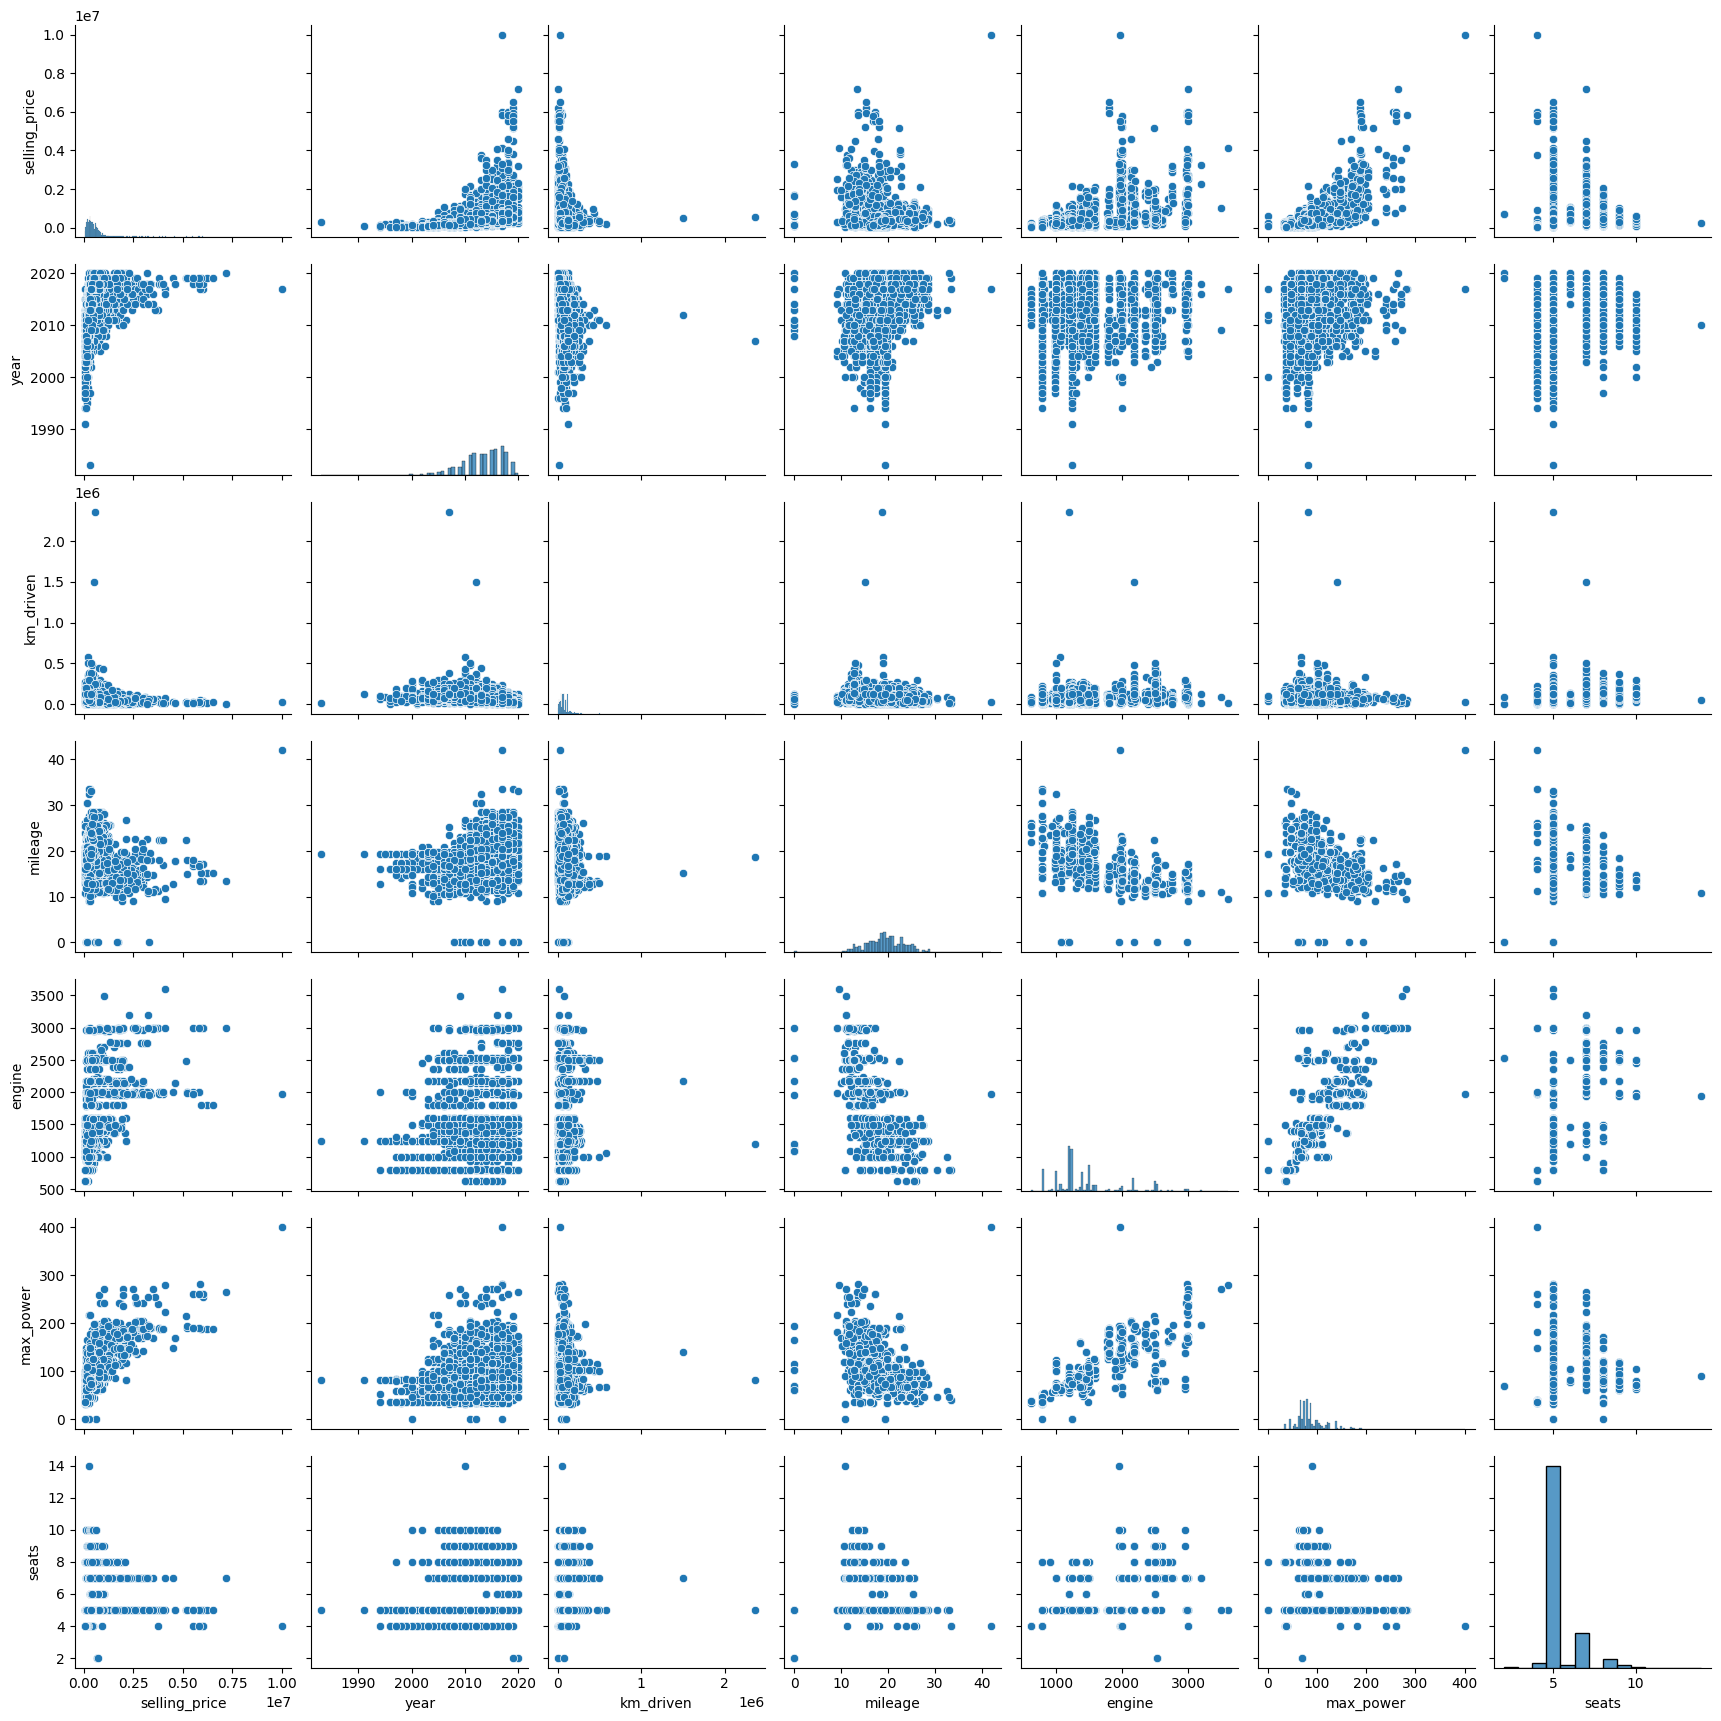

In [ ]:
# pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
sns.pairplot(df_train)

Можно заметить, что *selling_price* прямо зависит от квадрата *year* (квадратная зависимость).
Также можно сказать, что присутствует зависимость *selling_price* от *engine*, *max_power*. Чем выше *engine*, *max_power*, тем выше эти показатели (возможно линейная регрессия)

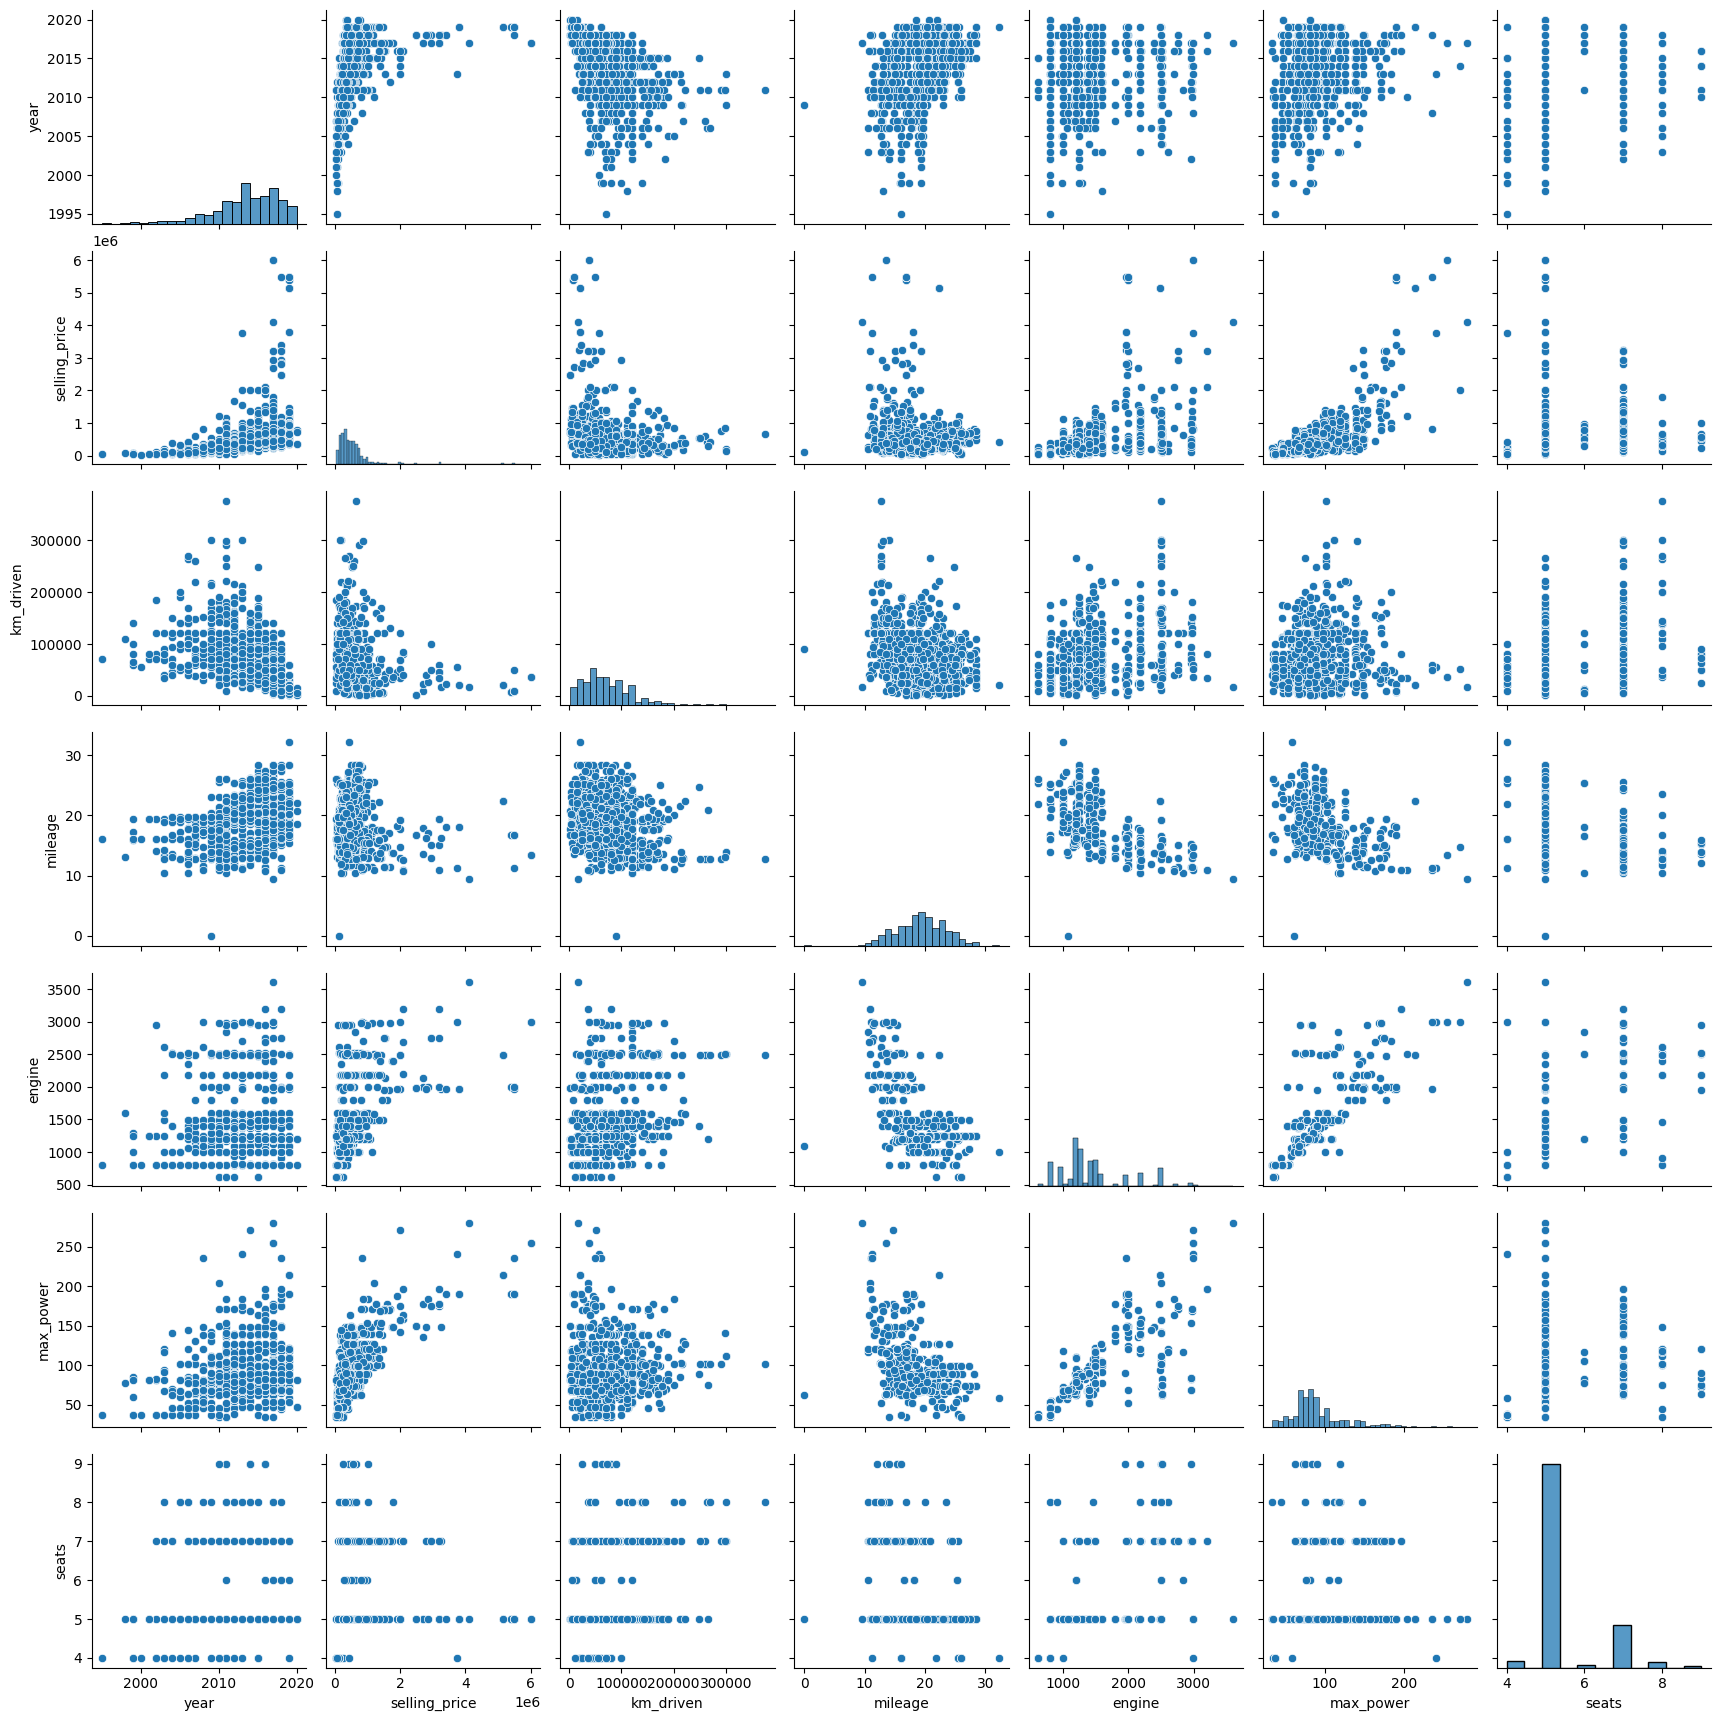

In [ ]:
# pairplot по тестовым данным
sns.pairplot(df_test)

Можно сказать, что соответствующие графики зависимостей ведут себя похоже. Совокупности *train* и *test* ведут себя схожим образом

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [ ]:
df_train.corr(numeric_only=True)

,selling_price,year,km_driven,mileage,engine,max_power,seats
selling_price,1.000000,0.427279,-0.164828,-0.104769,0.447672,0.692725,0.149953
year,0.427279,1.000000,-0.368966,0.341334,0.002819,0.158207,0.041178
km_driven,-0.164828,-0.368966,1.000000,-0.182086,0.229766,0.024379,0.192328
mileage,-0.104769,0.341334,-0.182086,1.000000,-0.572893,-0.372197,-0.451059
engine,0.447672,0.002819,0.229766,-0.572893,1.000000,0.681247,0.652172
max_power,0.692725,0.158207,0.024379,-0.372197,0.681247,1.000000,0.242791
seats,0.149953,0.041178,0.192328,-0.451059,0.652172,0.242791,1.000000


<Axes: >

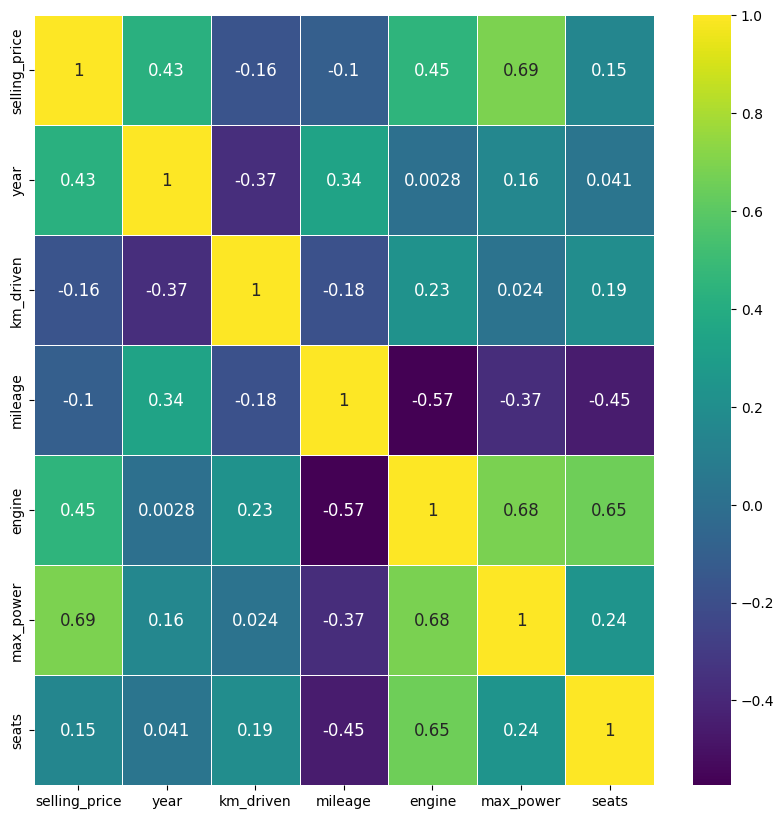

In [ ]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. *engine* и *year* наименее скоррелированы между собой (корреляция близка к нулю).
2. Довольно сильная положительная линейная зависимость наблюдается между*max_power* и *selling_price*
3. Коэффициент корреляции равен -0.37, это довольно высокое значение, значит корреляция присутствует, но так как -0.37 < 0, то значит зависимость обратная. Можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
categorial_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
df_train_physical = df_train.drop(categorial_columns, axis=1)
df_test_physical = df_test.drop(categorial_columns, axis=1)

y_train = df_train_physical['selling_price'] # train price
X_train = df_train_physical.loc[:, df_train_physical.columns != 'selling_price'] # train other
X_train_copy = df_train_physical.loc[:, df_train_physical.columns != 'selling_price']

y_test = df_test_physical['selling_price'] # test price
X_test = df_test_physical.loc[:, df_test_physical.columns != 'selling_price'] # test other

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()

model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)
print('MSE для теста', MSE(y_test, prediction_test)) #MSE для теста
print('MSE для train', MSE(y_train, prediction_train) ) #MSE для train
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))

MSE для теста 233551443099.39868
MSE для train 117090306033.0161
R2 для тест 0.5937024338674333
R2 для треин 0.5915050767325436


In [ ]:
lasso.coef_

Значение MSE по y_test значительно выше, чем аналогичное по y_train. В этом нет ничего удивительного, ведь модель обучалась на y_train, ошибка у нее будет ниже. Преимущество MSE - чувствительность к большим ошибкам




значения r2 для трейна и для теста отличаются только в третьем знаке после запятой. Преимущество - инвариантность к масштабу данных. Значение близкое к 1 (как у нас, 0.59 в траине и в тесте) указывает на высокую степень соответствия модели данным.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

model.fit(X_train_sc, y_train)

prediction_test = model.predict(X_test_sc)
prediction_train = model.predict(X_train_sc)

print('MSE для теста', MSE(y_test, prediction_test)) #MSE для теста
print('MSE для train', MSE(y_train, prediction_train) ) #MSE для train
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))

MSE для теста 233551443099.39087
MSE для train 117090306033.01596
R2 для тест 0.5937024338674468
R2 для треин 0.591505076732544


Видим, что последние цифры у MSE стали меньше, а у R2 больше. Это значит, что ошибка совсем немного уменьшилась и модель стала работать чуть-чуть лучше

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here
pd.DataFrame(data=np.array([model.coef_]), columns=X_train_copy.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152413.794764,-44299.634236,28483.920029,60671.644674,322577.605271,-22512.601794


In [38]:
with open('lin_reg.pkl', 'wb') as file:
    pickle.dump(model.coef_, file)

max_power имеет наибольшее значение по модулю, что делает его наиболее информативным признаком

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso # version 1

# your code here
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
prediction_test = lasso.predict(X_test_sc)
prediction_train = lasso.predict(X_train_sc)
print('MSE для теста', MSE(y_test, prediction_test)) #MSE для теста
print('MSE для train', MSE(y_train, prediction_train) ) #MSE для train
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))
pd.DataFrame(data=np.array([lasso.coef_]), columns=X_train_copy.columns)

# MSE для теста 233551443099.39087 задание 10
# MSE для train 117090306033.01596 задание 10
# R2 для тест 0.5937024338674468 задание 10
# R2 для треин 0.591505076732544 задание 10

MSE для теста 233552116809.94913
MSE для train 117090306043.14563
R2 для тест 0.5937012618474564
R2 для треин 0.5915050766972044


,year,km_driven,mileage,engine,max_power,seats
0,152413.608387,-44298.505045,28482.039841,60666.793474,322578.508398,-22509.714823


In [39]:
with open('lasso.pkl', 'wb') as file:
    pickle.dump(lasso.coef_, file)

Странно, но MSE выросло, а R2 стало меньше, чем в 10 задании. Это говорит о том, что lasso работает хуже. Коэффициенты не обнулились, лишь поменялись незначительно. Это говорит о том, что каждый показатель влияет на предсказание стоимости авто

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}

gs = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error') # cv= 10 колво фолдов
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

10 фолдов, те мы обучаем модель 10 раз для каждого гиперпараметра( их всего 5). Всего 50 моделей.
Какой коэффициент регуляризации у лучшей из перебранных моделей? alpha = 10. -gs.best_score_ = 121547644891.48471

In [ ]:
# your code here
-gs.best_score_, gs.best_estimator_, gs.best_params_

(121547644891.48471, Lasso(alpha=10), {'alpha': 10})

In [ ]:
y_pred_test = gs.predict(X_test_sc)
mse_test = MSE(y_test, y_pred_test)

y_pred_train = gs.predict(X_train_sc)
mse_train = MSE(y_train, y_pred_train)

print(f"MSE для тест: {mse_test:.3f}")
print(f"MSE для train: {mse_train:.3f}")
print('R2 для тест', r2_score(y_test, y_pred_test))
print('R2 для треин', r2_score(y_train, y_pred_train))

# MSE для теста 233552116809.94913
# MSE для train 117090306043.14563
# R2 для тест 0.5937012618474564
# R2 для треин 0.5915050766972044

MSE для тест: 233558188900.198
MSE для train: 117090307043.017
R2 для тест 0.593690698540903
R2 для треин 0.5915050732089362


In [ ]:
pd.DataFrame(data=np.array([gs.best_estimator_.coef_]), columns=X_train_copy.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152411.58883,-44288.437426,28465.498495,60623.164244,322586.770565,-22483.581279


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 10],
    'l1_ratio': [0.01, 0.1, 0.5, 0.8, 1]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.8, 1]},
             scoring='r2')

In [ ]:
print(len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10) # всего моделей
print(grid_search.best_params_) # лучшие параметры

250
{'alpha': 0.5, 'l1_ratio': 0.8}


Тк len(alpha) = len(l1_ratio) = 5, cv=10, то всего (5^2)*10 = 250 моделей.






# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
del df_train['name']
del df_test['name']

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
del df_train['selling_price']
del df_test['selling_price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
categorial_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
X_train_encoded = pd.get_dummies(df_train, columns=categorial_columns, drop_first=True)
X_test_encoded = pd.get_dummies(df_test, columns=categorial_columns)
X_test_encoded = X_test_encoded.drop(['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner'], axis=1) #  в тестовом дф меньше признаков, поэтому удаляем некоторые столбцы вручную в силу отсутствия опыта

X_test_encoded = X_test_encoded.assign(seats_4=False)
X_test_encoded = X_test_encoded.assign(seats_10=False)
X_test_encoded = X_test_encoded.assign(seats_14=False)

X_test_encoded = X_test_encoded.reindex(columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'])

In [ ]:
X_train_encoded.shape

(5840, 23)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}

ridge_model = Ridge(max_iter=1000)

gs = GridSearchCV(ridge_model, params, cv=10, scoring='neg_mean_squared_error') # cv=10
gs.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(107376119246.52469, Ridge(alpha=10, max_iter=1000), {'alpha': 10})

In [ ]:
pd.DataFrame(data=np.array([gs.best_estimator_.coef_]), columns=X_train_encoded.columns)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,36040.422147,-0.510534,8071.050926,75.311569,9124.386353,9455.716657,107011.545759,-46634.275635,-111764.316383,-97296.396263,...,936064.099947,-36966.874924,441770.81485,-95421.332083,-150825.918653,-86870.131969,-41836.187094,-45253.351215,-16718.183633,-23071.253971


In [40]:
with open('ridge.pkl', 'wb') as file:
    pickle.dump(gs.best_estimator_.coef_, file)

In [ ]:
y_pred_test = gs.predict(X_test_encoded)
mse_test = MSE(y_test, y_pred_test)

y_pred_train = gs.predict(X_train_encoded)
mse_train = MSE(y_train, y_pred_train)

print(f"MSE для тест: {mse_test:.3f}")
print(f"MSE для train: {mse_train:.3f}")
print('R2 для тест', r2_score(y_test, y_pred_test))
print('R2 для треин', r2_score(y_train, y_pred_train))

# MSE для тест: 233558188900.198 из предыдущего задания
# MSE для train: 117090307043.017 из предыдущего задания
# R2 для тест 0.593690698540903 из предыдущего задания
# R2 для треин 0.5915050732089362 из предыдущего задания

MSE для тест: 206106535502.079
MSE для train: 99402746944.129
R2 для тест 0.6414469436488532
R2 для треин 0.6532119621066933


Мы видим значительное снижение MSE и рост R2 (ошибки уменьшились примерно на 10%), что говорит нам о том, что после one-hot кодирования категориальных признаков наша модель стала значительно лучше предсказывать target

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
import numpy as np

def business_metric(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) <= 0.1 * y_true)

y_pred = model.predict(X_test_sc)
metric_value = business_metric(y_test, y_pred) * 100
print("Linear Regression",  metric_value, '%')
y_pred = lasso.predict(X_test_sc)
metric_value = business_metric(y_test, y_pred) * 100
print("Lasso",  metric_value, '%')
y_pred = gs.predict(X_test_encoded)
metric_value = business_metric(y_test, y_pred) * 100
print("Ridge",  metric_value, '%')

Linear Regression 22.5 %
Lasso 22.5 %
Ridge 24.7 %


Доля прогнозов `Ridge` С ошибкой <= 10% равняется 24.7 %. Это больше, чем у `Linear Regression` и `Lasso`, а значит `Ridge` дает более точный прогноз

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



UPD: Спасибо, очень приятно! Потратил на эту домашку достаточно много времени. Предполагаю, что это кот *Елены Кантонистовой*